In [5]:
library(tidyverse)
library(nycflights13)
library(lubridate)

### Review
There are 105 unique destinations in `flights`. How many of these were *not* flown to by a model `A320-232` airplane?

In [194]:
# Your code here

# Lecture 11: Importing data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand how to import data from various sources
</div>


## Types of data
You will encounter data in many different formats. Here are a few of the most common ones:

### Comma-separated value data
Comma-separated value (csv) is one of the most common formats for sharing data. It has the advantage of being human-readable. The disadvantage is that there is no actual standard for reading or writing these files!

Here's an example of CSV data on heights:
    
    "earn","height","sex","ed","age","race"
    50000,74.4244387818035,"male",16,45,"white"
    60000,65.5375428255647,"female",16,58,"white"
    30000,63.6291977374349,"female",16,29,"white"
    50000,63.1085616752971,"female",16,91,"other"
    51000,63.4024835710879,"female",17,39,"white"
    9000,64.3995075440034,"female",15,26,"white"
    
The first row (usually) has a *header* giving the column names. Subsequent rows give the actual data. Strings are (usually) quoted.

You might also see these data come in the format:
    
    earn,height,sex,ed,age,race
    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No quotes!

Or even:

    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No column names!

The `read_csv` command is designed to read this type of file. Note that this command is part of `tidyverse` and is different from `read.csv` in R! You generally want to use `read_csv` over `read.csv` since:
- It is much faster.
- It outputs nicely formatted `tibble`s which you can pass into other tidyverse functions.

In [7]:
heights <- read_csv("heights.csv")

Parsed with column specification:
cols(
  earn = col_double(),
  height = col_double(),
  sex = col_character(),
  ed = col_double(),
  age = col_double(),
  race = col_character()
)


Here `read_csv` has told us what columns it found, and also what the data types it found for them are. Generally these will be correct but we will see examples later where it guesses wrongly and we have to manually override them.

Here is another version of `heights`, where we are not lucky enough to have a header telling us which columns came from where:

In [11]:
read_csv("heights_no_hdr.csv") %>% print

Parsed with column specification:
cols(
  `50000` = col_double(),
  `74.4244387818035` = col_double(),
  male = col_character(),
  `16` = col_double(),
  `45` = col_double(),
  white = col_character()
)


# A tibble: 1,191 x 6
   `50000` `74.4244387818035` male    `16`  `45` white   
     <dbl>              <dbl> <chr>  <dbl> <dbl> <chr>   
 1   60000               65.5 female    16    58 white   
 2   30000               63.6 female    16    29 white   
 3   50000               63.1 female    16    91 other   
 4   51000               63.4 female    17    39 white   
 5    9000               64.4 female    15    26 white   
 6   29000               61.7 female    12    49 white   
 7   32000               72.7 male      17    46 white   
 8    2000               72.0 male      15    21 hispanic
 9   27000               72.2 male      12    26 white   
10    6530               69.5 male      16    65 white   
# ... with 1,181 more rows


Now `read_csv()` has erroneously assumed that the first row of data are the header names. To override this behavior we need to specify the column names by hand:

In [14]:
read_csv("heights_no_hdr.csv", col_names = F) %>% print

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character()
)


# A tibble: 1,192 x 6
      X1    X2 X3        X4    X5 X6      
   <dbl> <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000  74.4 male      16    45 white   
 2 60000  65.5 female    16    58 white   
 3 30000  63.6 female    16    29 white   
 4 50000  63.1 female    16    91 other   
 5 51000  63.4 female    17    39 white   
 6  9000  64.4 female    15    26 white   
 7 29000  61.7 female    12    49 white   
 8 32000  72.7 male      17    46 white   
 9  2000  72.0 male      15    21 hispanic
10 27000  72.2 male      12    26 white   
# ... with 1,182 more rows


In [15]:
read_csv("heights_no_hdr.csv", col_names = c("earn", "height", "sex", "ed", "age", "race")) %>% print

Parsed with column specification:
cols(
  earn = col_double(),
  height = col_double(),
  sex = col_character(),
  ed = col_double(),
  age = col_double(),
  race = col_character()
)


# A tibble: 1,192 x 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# ... with 1,182 more rows


To create short examples illustrating `read_csv`'s behavior, we can specify the contents of a csv file inline.

In [91]:
read_csv(
    "a, b, c
     1, 2, 3
     4, 5, 6
")

  a b c
1 1 2 3
2 4 5 6

You might want to skip a few rows in the beginning that have metadata.

In [18]:
read_csv(
"First row to skip
Second row to skip
Third row to skip
a, b, c
1, 2, 3
4, 5, 6
", skip = 3)

a,b,c
1,2,3
4,5,6


Some CSVs will come with comments, typically in the form of lines prefaced by `#`. You can also skip comments line by specifying a comment character.

In [20]:
read_csv("
# First comment line
a, b, c
# This separate the header from the data
1, 2, 3
4, 5, 6
# Another comment line
", comment = '#')

a,b,c
1,2,3
4,5,6


Set `col_names = FALSE` when you don't have column names in the file. The column names are then set to X1, X2, ...

In [186]:
read_csv("
1, 2, 3
4, 5, 6
", col_names = FALSE)

  X1 X2 X3
1 1  2  3 
2 4  5  6 

You can specify your own column names.

In [101]:
read_csv("
1, 2, 3
4, 5, 6
", col_names = c("a", "b", "c"))

  a b c
1 1 2 3
2 4 5 6

You can specify how missing values are represented in the file.

In [189]:
read_csv(
    "a, b, c
     1, 2, 3
     4,,6
") %>% print

# A tibble: 2 x 3
      a     b     c
  <int> <int> <int>
1     1     2     3
2     4    NA     6


In [191]:
read_csv(
    "a, b, c
     1, 2, 3
     4, ., 6
", na = ".") %>% print

# A tibble: 2 x 3
      a     b     c
  <int> <int> <int>
1     1     2     3
2     4    NA     6


You can write a tibble to a csv file using `write_csv()`.

In [193]:
cubes %>% print
write_csv(cubes, "cubes.csv")

# A tibble: 10 x 3
     `1`   `2` `3 space 4`
   <int> <dbl>       <dbl>
 1     1     1           1
 2     2     4           8
 3     3     9          27
 4     4    16          64
 5     5    25         125
 6     6    36         216
 7     7    49         343
 8     8    64         512
 9     9    81         729
10    10   100        1000


In [194]:
cat(read_file('cubes.csv'))

1,2,3 space 4
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1e3


In [196]:
cubes2 <- read_csv("cubes.csv")
print(cubes2)

Parsed with column specification:
cols(
  `1` = col_integer(),
  `2` = col_integer(),
  `3 space 4` = col_double()
)


# A tibble: 10 x 3
     `1`   `2` `3 space 4`
   <int> <int>       <dbl>
 1     1     1           1
 2     2     4           8
 3     3     9          27
 4     4    16          64
 5     5    25         125
 6     6    36         216
 7     7    49         343
 8     8    64         512
 9     9    81         729
10    10   100        1000


### Fixed-width files
Another common data format is called a *fixed-width file*. Each data column gets its own fixed width, in this case five spaces:

    a     b     c
    10    2     3
    4     1.5   3

To read this type of data we use the `read_table()` function:

In [207]:
read_table("a     b    c
10    2     3
4     1.5   3")

  a  b   c
1 10 2.0 3
2  4 1.5 3

### Exercise
The file `78FG.DAT` contains fixed-width data about fuel economy of cars made in 1978. What was the average fuel economy (gas mileage) for these cars? ([Here](https://github.com/hadley/data-fuel-economy/blob/7464a2defe7dd3ae84957385fa6e4f962b54207b/documentation/data-format.txt#L324) is the documentation for this file format.)

In [4]:
# Your code here
cat(readLines("78FG.DAT", 10))

 100  1110 2005    3 18 25 21   500 232     6   1AY 18.4410 25.2715 20.9946               7                        GREMLIN  100  1110 2005    3 20 28 23   457 232     6   1MY 20.0925 27.8862 22.9830               7                        GREMLIN 1010  1110 2005    3 17 21 19   552 258     6   1AY 17.0000 21.3000 18.6987               7                        GREMLIN 1010  1110 2005    3 15 21 17   617 258     6   1MY 14.7000 20.7000 16.9050               7                        GREMLIN  100  1110 2010    4 18 23 20   525 232     6   1AY 18.0656 23.4526 20.1482               7                        PACER  100  1110 2010    4 19 26 22   478 232     6   1MY 19.4237 25.9397 21.8991               7                        PACER 1010  1110 2010    4 16 20 18   584 258     6   1AY 16.5000 19.7000 17.8012               7                        PACER 1010  1110 2010    4 15 21 17   617 258     6   1MY 14.7000 21.0000 16.9942               7                        PACER  100  1110 2015    7 18 

### How parsing works
Sometimes the automatic parsers will fail. To understand why, it's helpful to look at how these functions actually parse data.

The first step is to guess each column type. The parser functions will look at the first few entries of each column and use that to try and guess the column type. The default is 1000 entries and can be controlled with the `guess_max=` option.

In [211]:
tbl = read_csv(
"a, b
1, 3
2, 4
's', 't'
", guess_max=2
)
problems(tbl)

Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row   col   expected actual         file expected   <int> <chr>      <chr>  <chr>        <chr> actual 1     3     a an integer    's' literal data file 2     3     b an integer    't' literal data
”

  row col expected   actual file        
1 3   a   an integer 's'    literal data
2 3   b   an integer 't'    literal data

The reason this fails for `guess_max=2` is that it looks at the first two entries, sees integers, and assumes the rest of the column will be integers. Then it calls the `parse_integer()` function on the vector of strings `c("1", "2", "'b'")`:

In [221]:
# guess_parser(c("1.1", "2"))
# guess_parser(c("1", "2", "c"))
parse_integer(c("1", "2", "b"))

Warning message:
“1 parsing failure.
row # A tibble: 1 x 4 col     row   col   expected actual expected   <int> <int>      <chr>  <chr> actual 1     3    NA an integer      b
”

[1]  1  2 NA
attr(,"problems")
# A tibble: 1 x 4
    row   col   expected actual
  <int> <int>      <chr>  <chr>
1     3    NA an integer      b

A useful function for figuring out why parsing went wrong is `problems()`:

In [178]:
tbl = read_csv(
"a, b
1, 3
2, 4
'b', 'c'
", guess_max=2
)
problems(tbl)

Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row   col   expected actual         file expected   <int> <chr>      <chr>  <chr>        <chr> actual 1     3     a an integer    'b' literal data file 2     3     b an integer    'c' literal data
”

  row col expected   actual file        
1 3   a   an integer 'b'    literal data
2 3   b   an integer 'c'    literal data

If you already know what format each column has, rather than hoping it guesses correctly you can simply tell that to R:

In [214]:
read_csv(
"a, b
1, 3
2, 4
1, 2
",
   col_types=list(
       a=col_character(),
       b=col_character()
   )
) %>% print

# A tibble: 3 x 2
      a     b
  <chr> <chr>
1     1     3
2     2     4
3     1     2


## Reading data from the Internet
These days, it's increasingly common to pull data from online sources. For example, say I wanted to know the population of European countries. This is [easily found](https://en.wikipedia.org/wiki/Demographics_of_Europe#Population_by_country) on Wikipedia. How can I get these data into R and analyze them?

We will use the package `htmltab` for this purpose.

In [21]:
library(htmltab)

The syntax of this command is:

```
htmltab(<url>, <table identifier>)
```

Let's try it with the Wikipedia page above:

In [173]:
url <- "http://en.wikipedia.org/wiki/Demographics_of_Europe#Population_by_country"
htmltab(url)

Argument 'which' was left unspecified. Choosing first table.


,AD 1,1000,1500,1600,1700,1820,1913,2000
2,34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%)


This did not produce what we want. The reason is that there are many tables on this page, and by default `htmltab()` just takes the first one it finds. We can pass a number as the second argument in order to take the second, third, etc.:

In [174]:
europe.pop <- htmltab(url, 2) %>% tbl_df %>% print

# A tibble: 60 x 5
   `Country/territory`  `Area(km)` Population `Population density(p… Capital    
 * <chr>                <chr>      <chr>      <chr>                  <chr>      
 1 Albania              28,748     3,020,209  105.1                  Tirana     
 2 Andorra              468        85,082     181.8                  Andorra la…
 3 Armenia              29,743     3,018,854  101.5                  Yerevan    
 4 Austria              83,879     8,504,850  101.4                  Vienna     
 5 Azerbaijan           86,600     9,754,830  112.6                  Baku       
 6 Belarus              207,595    9,475,100  45.6                   Minsk      
 7 Belgium              30,528     11,198,638 366.8                  Brussels   
 8 Bosnia and Herzegov… 51,197     3,871,643  75.6                   Sarajevo   
 9 Bulgaria             110,994    7,364,570  66.4                   Sofia      
10 Croatia              56,594     4,284,889  75.7                   Zagreb     
# ... wit

To get `europe.pop` into a usable format we need to do a bit more work:

# A tibble: 10 x 5
   `Country/territory` `Area(km)` Population `Population density(per k… Capital 
   <chr>               <chr>           <dbl> <chr>                      <chr>   
 1 France              643,801      67210000 103.7                      Paris   
 2 Germany             357,168      80716000 226.0                      Berlin  
 3 Italy               301,338      60782668 201.7                      Rome    
 4 Poland              312,679      38483957 123.1                      Warsaw  
 5 Romania             238,391      19942642 83.7                       Buchare…
 6 Russia              17,075,400  143700000 8.5                        Moscow  
 7 Spain               504,645      46704314 92.6                       Madrid  
 8 Turkey              783,356      79814871 102                        Ankara  
 9 Ukraine             603,628      42539010 73.8                       Kiev    
10 United Kingdom      243,610      64100000 263.1                      London  


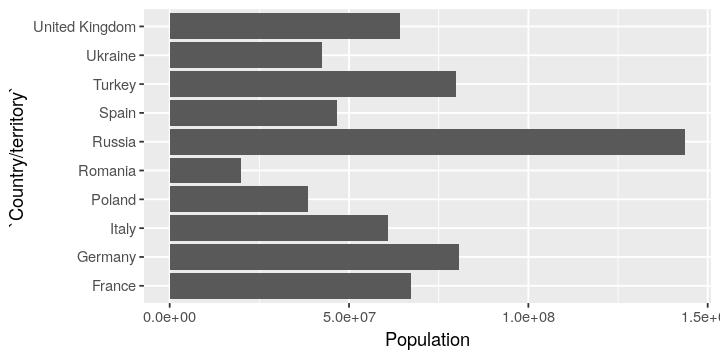

In [175]:
europe.pop %>% mutate(Population = as.numeric(gsub(",", "", Population))) %>% 
    top_n(10, Population) %>% print %>% ggplot + 
    geom_col(aes(x = `Country/territory`, 
                 y = Population)) + 
    coord_flip()

### Exercise
Reproduce the plot!
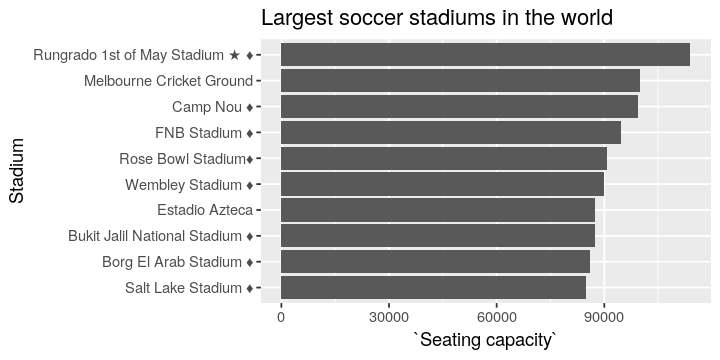

In [79]:
# Your code here

### More advanced locators
Sometimes a page has a lot of tables and it's not easy to count them: [example](https://en.wikipedia.org/wiki/Opinion_polling_on_the_Donald_Trump_administration). Say I want the table on polling about Refugee Restrictions. I can use a selector to get the first table following some text:

In [177]:
htmltab("http://en.wikipedia.org/wiki/Opinion_polling_on_the_Donald_Trump_administration",
       "//td[contains(text(), 'January 9–16, 2017')]/ancestor::table") %>% head

Warning message:
“Columns [Source] seem to have no data and are removed. Use rm_nodata_cols = F to suppress this behavior”

,Area polled,Segment polled,Polling group,Date,Support,Oppose,Unsure,Sample size,Polling method
2,United States,All adults,YouGov (for HuffPost),"May 25–26, 2017",45%,43%,13%,"1,000",online
3,United States,All adults,Gallup,"March 9–29, 2017",40%,46%,14%,"1,526",telephone
4,United States,Registered voters,Quinnipiac University,"March 16–21, 2017",42%,52%,6%,"1,056",telephone
5,California,All adults,Public Policy Institute of California,"March 6–14, 2017",37%,58%,5%,"1,487",telephone
6,United States,All adults,Pew Research Center,"February 28 – March 12, 2017",47%,52%,1%,"3,844",telephone and online
7,United States,Registered voters,Quinnipiac University,"March 2–6, 2017",42%,51%,7%,"1,323",telephone


The key part of this is the second argument to `htmltab`:

    "//td[contains(text(), 'January 9–16, 2017')]/ancestor::table")

This says "find the first table which has a cell containing the entry `January 9–16, 2017`. I just picked a cell entry at random from the table and hope that it would  match. Usually this trick works as long as you pick something that is unique to that table.

### Exercise
Generate an interesting plot based on the polling data found on the above Wikipedia page.

### Exercise (interactive)
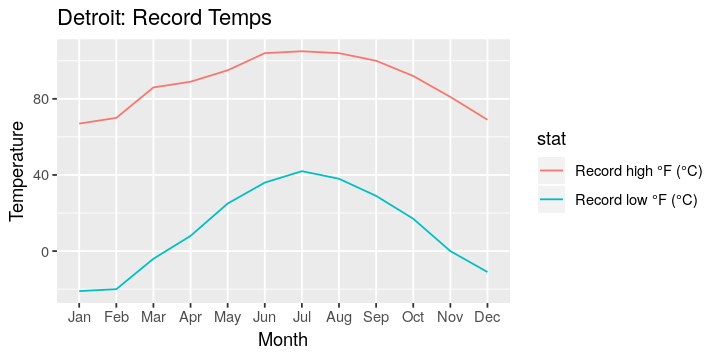